In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [3]:
hcare=pd.read_excel("1645792390_cep1_dataset.xlsx")
hcare

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
hcare.shape

(303, 14)

In [5]:
hcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
hcare.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
# Checking for missing values
hcare.isnull().sum(axis = 0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
hcare.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
# For visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import seaborn as sns

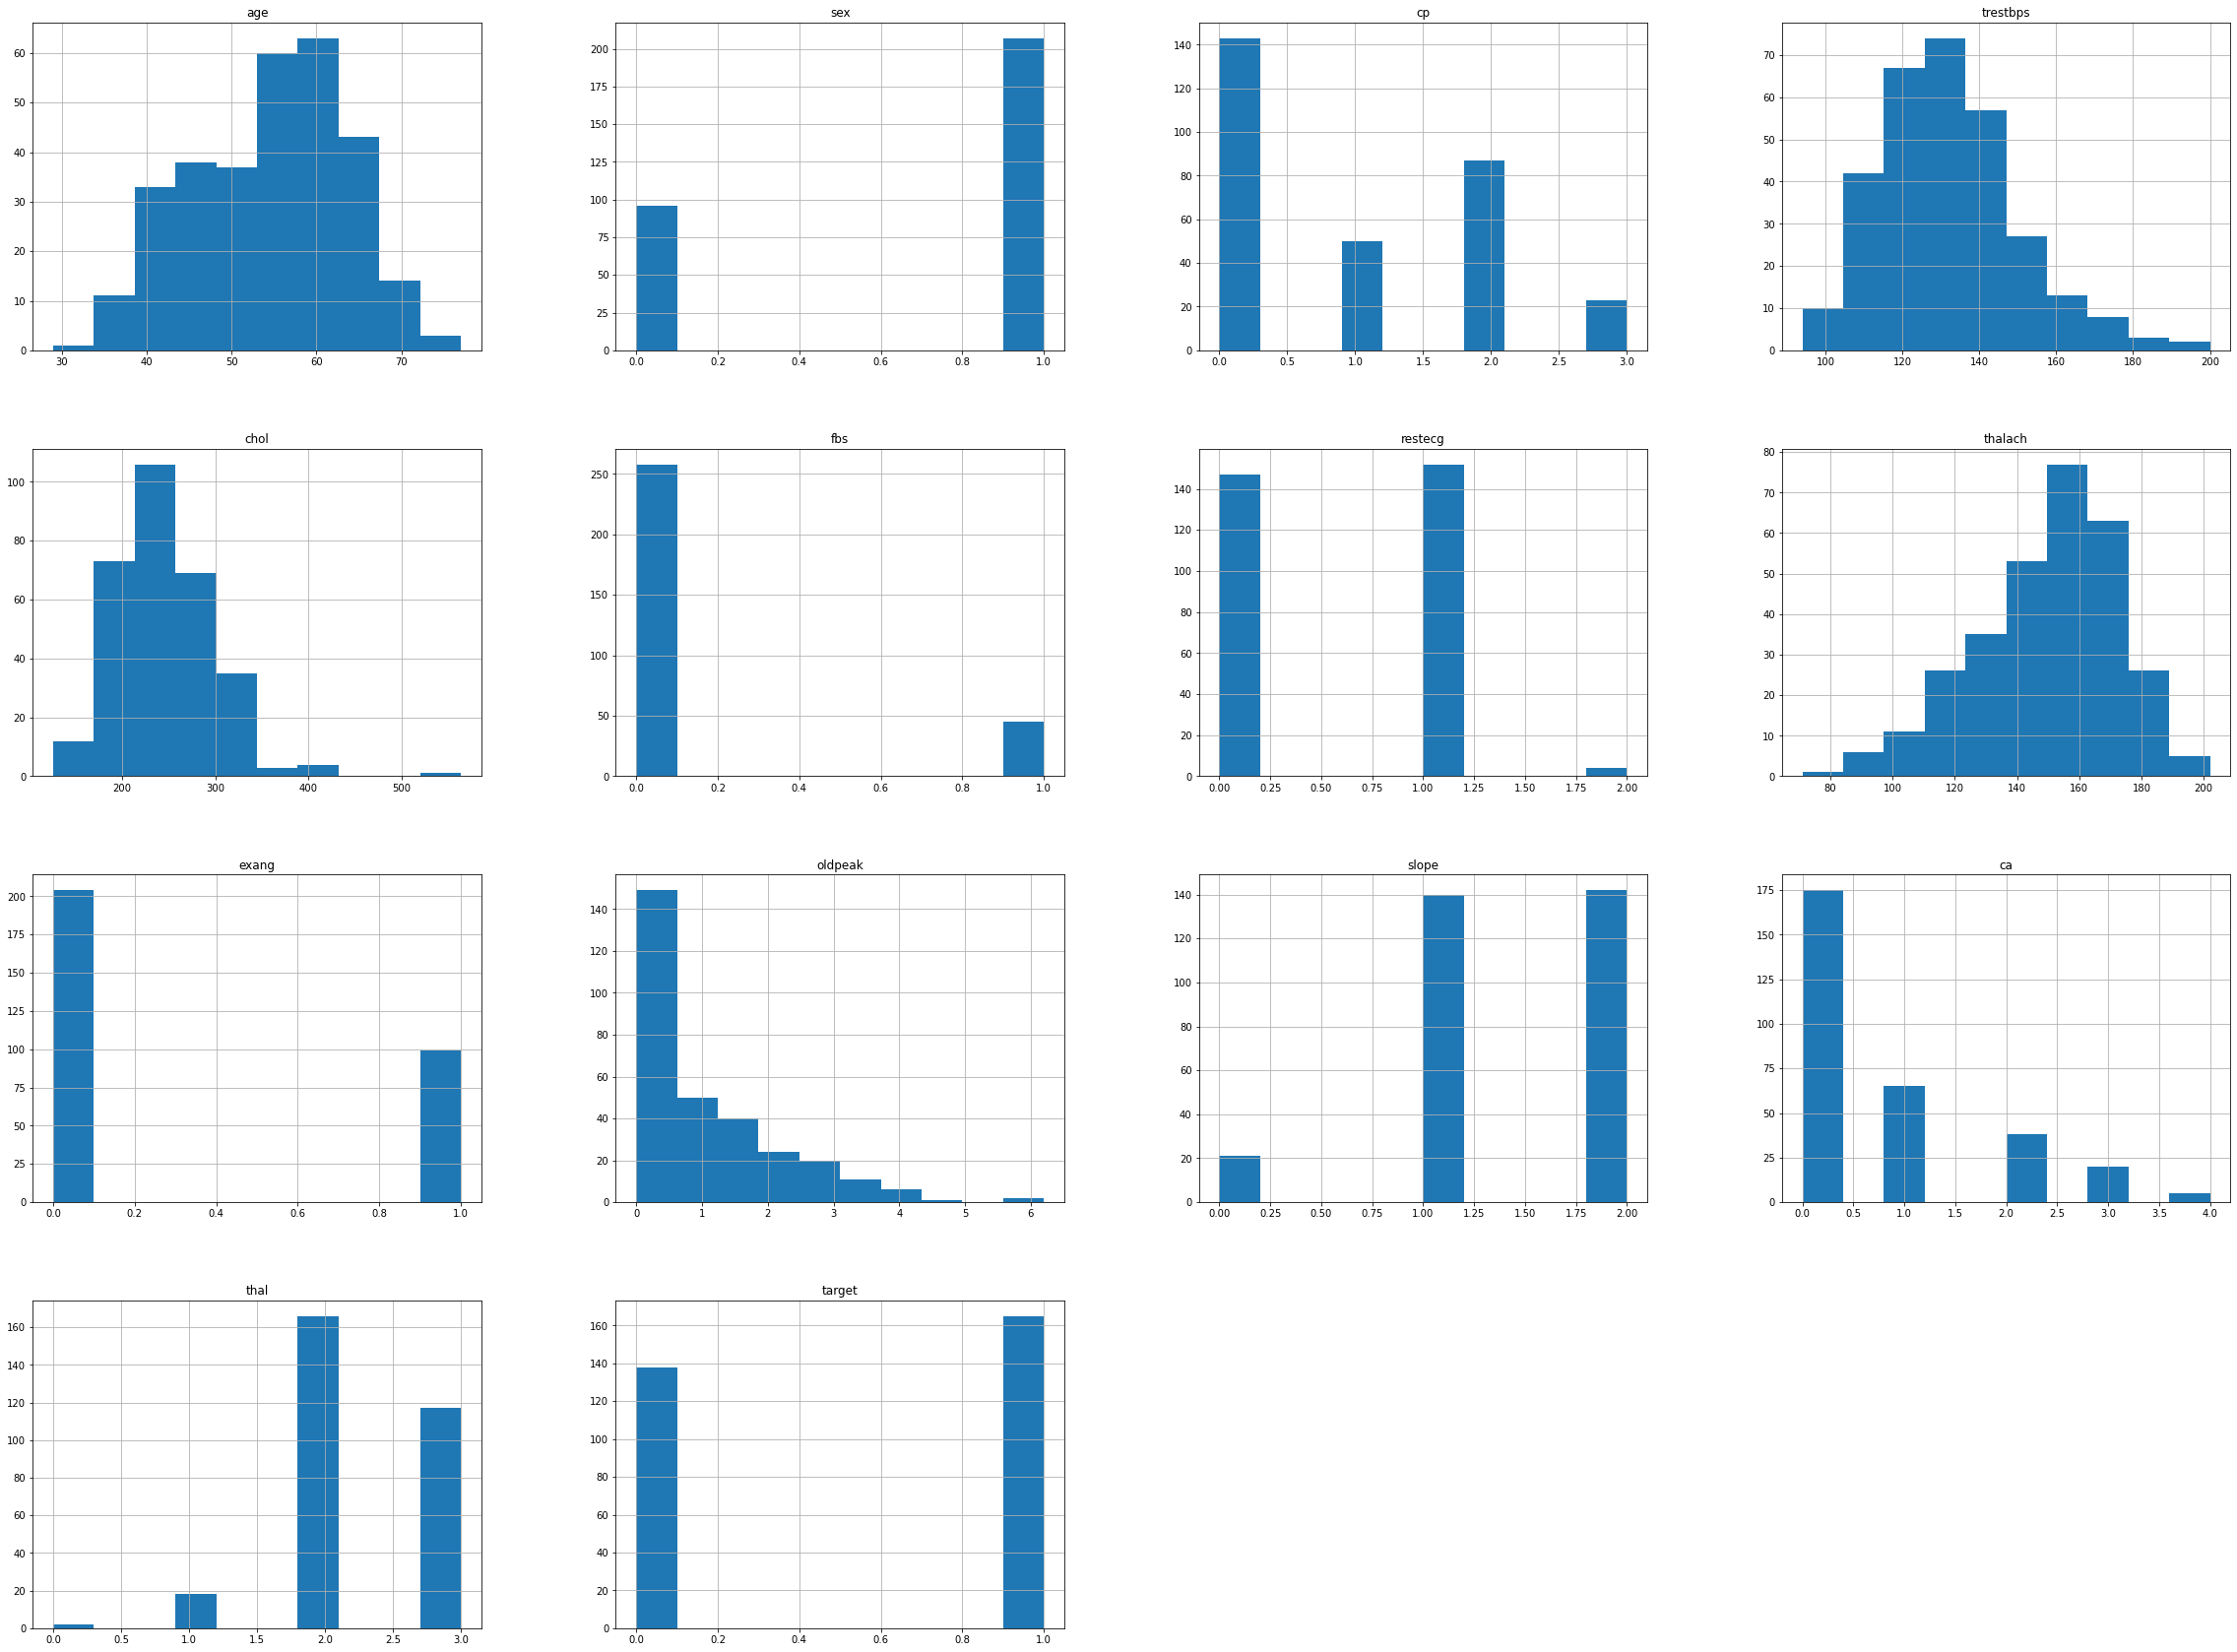

In [10]:
# Histogram of the Heart Dataset

fig = plt.figure(figsize = (40,30))
hcare.hist(ax = fig.gca());

#### From the above histogram plots, we can see that the features are skewed and not normally distributed. Also, the scales are different between one and another.

## Understanding the Data

#### Let us observe the creelation between different features with help of a heat mat.

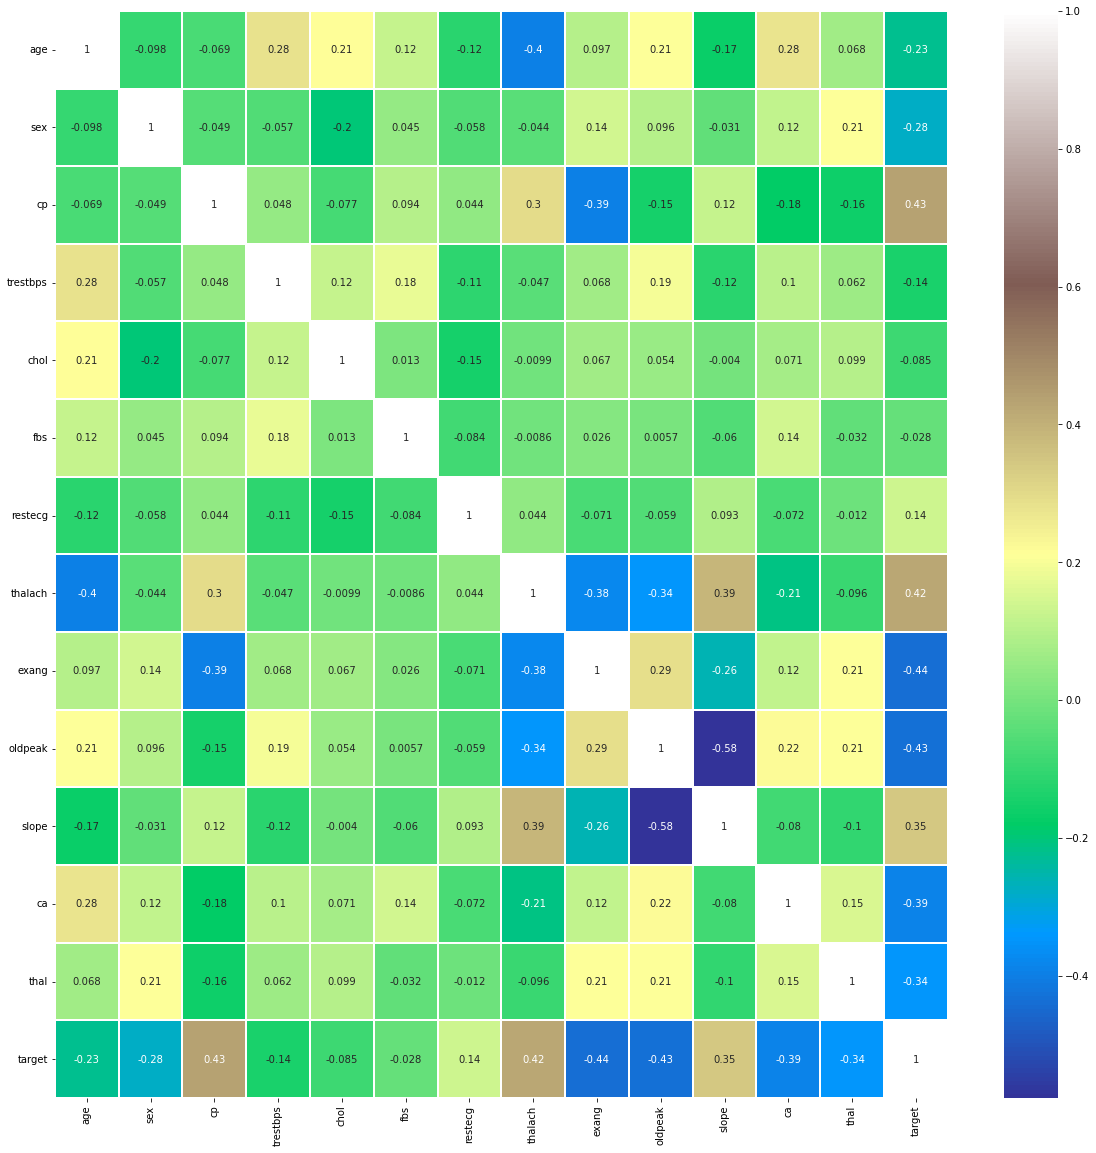

In [14]:
# Creating a correlation heatmap
sns.heatmap(hcare.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(20,20)
plt.show()

##### From the above HeatMap, we can see that cp and thalach are the features with highest positive correlation whereas exang, oldpeak and ca are negatively correlated.While other features do not hold much correlation with the response variable "target".

### Outlier Detection

Since the dataset is not large, we cannot discard the outliers. We will treat the outliers as potential observations.

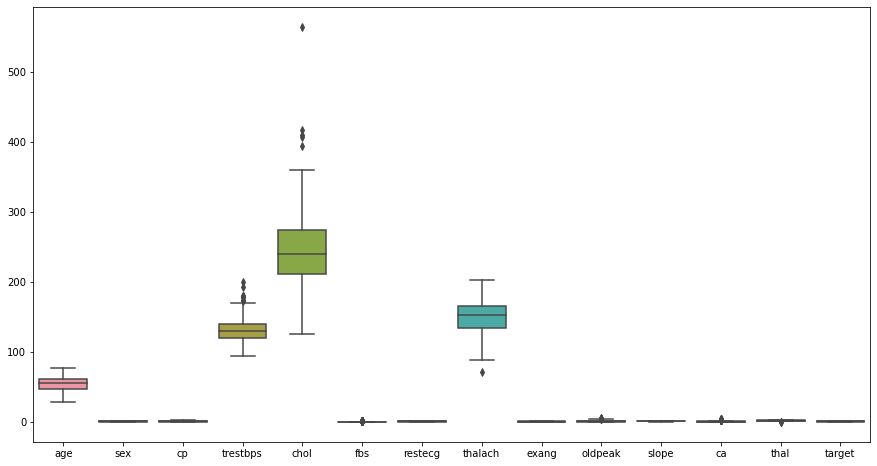

In [15]:
# Boxplots
fig_dims = (15,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(data=hcare, ax=ax);

### Handling Imbalance

Imbalance in a dataset leads to inaccuracy and high precision, recall scores. There are certain resampling techniques such as undersampling and oversampling to handle these issues.

Considering our dataset, the response variable target has two outcomes "Patients with Heart Disease" and "Patients without Heart Disease". Let us now observe their distribution in the dataset.

In [16]:
hcare["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

##### From the above chart, we can conclude even when the distribution is not exactly 50:50, but still the data is good enough to use on machine learning algorithms and to predict standard metrics like Accuracy and AUC scores. So, we do not need to resample this dataset.

### Train-Test Split

Let us distribute the data into training and test datasets using the train_test_split() function.

In [17]:
X = hcare.drop("target",axis=1)
y = hcare["target"]

### Logistic Regression

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,stratify=y,random_state=7)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [21]:
pred = lr.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
# Accuracy on Test data
accuracy_score(y_test, pred)

0.8032786885245902

In [24]:
# Accuracy on Train data
accuracy_score(y_train, lr.predict(X_train))

0.8471074380165289

### Building a predictive system

In [25]:
import warnings
in_data = (57,0,0,140,241,0,1,123,1,0.2,1,0,3)

# Changing the input data into a numpy array
in_data_as_numpy_array = np.array(in_data)

# Reshaping the numpy array as we predict it
in_data_reshape = in_data_as_numpy_array.reshape(1,-1)
pred = lr.predict(in_data_reshape)
print(pred)

if(pred[0] == 0):
    print('The person does not have heart disease.')
else:
    print('The person has heart disease.')

[0]
The person does not have heart disease.
